# A Multi Model Approach: Identification of Poisonous Mushrooms
Predictive Analytics Final Project

Project Participants

Gonul Reyhanoglu         
Hale Nur Kazacesme      
Reshma Vyas    



# Description of Mushroom Dataset

This dataset includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family Mushroom drawn from The Audubon Society Field Guide to North American Mushrooms (1981). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like "leaflets three, let it be'' for Poisonous Oak and Ivy (1).


# Objectives

Identifying which features are most indicative of a poisonous mushroom.

Comparing different types of machine learning models' performances on this dataset.


# Descriptive Analysis 

# 1- Download Packages 

In [2]:
#Packages for descriptive analysis
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline


# 2- Download Data

In [3]:
mushrooms = pd.read_csv('mushrooms.csv') # download data

#(2) https://archive.ics.uci.edu/ml/datasets/mushroom

# 3- Data Analysis

In [4]:
mushrooms.shape # checking number of columns and rows 

(8124, 23)

The dataset has 22 predictive variables and a label column. The number of observation in the data is around 8 thousand.

# Atribute Information

In [5]:
mushrooms.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There is no null data in the dataset. 

In [6]:
mushrooms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


All the feature variables are categorical. The class column shows that the data is not inbalanced. There are 2 classes and the distribution of classes are almost equal. 

# 4- Data Visualization

We are going to analize the following 4 more objectively identifiable atributes in detail. 

Cap-color    
Odor      
Population Type     
Habitat Type     


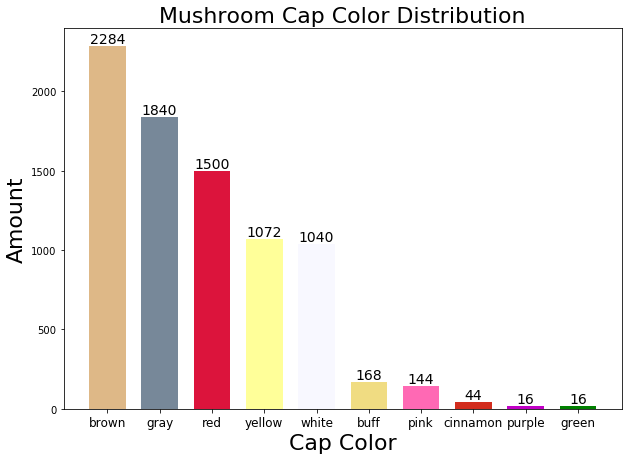

In [7]:
#The following bar chart shows distribution of mushrooms based on 'cap-color' 

#Get total number of mushrooms for each 'cap-color' 
cap_colors = mushrooms['cap-color'].value_counts()
m_height = cap_colors.values.tolist() #Gives numerical values
cap_colors.axes #Gives row labels
cap_color_labels = cap_colors.axes[0].tolist() #Converts index object to list

#Ploting details
ind = np.arange(10)  # the x locations for colors
width = 0.7        # the width of the bars
colors = ['#DEB887','#778899','#DC143C','#FFFF99','#f8f8ff','#F0DC82','#FF69B4','#D22D1E','#C000C5','g']
fig, ax = plt.subplots(figsize=(10,7))
mushroom_bars = ax.bar(ind, m_height , width, color=colors)

#Texts for labels, title and axes ticks
ax.set_xlabel("Cap Color",fontsize=22)
ax.set_ylabel('Amount',fontsize=22)
ax.set_title('Mushroom Cap Color Distribution',fontsize=22)
ax.set_xticks(ind) #Positioning on the x axis
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)

#Labeling the number of mushrooms for each bar color.
def autolabel(rects,fontsize=14):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)
autolabel(mushroom_bars)        
plt.show() #Display plot 

The bar chart shows the distribution of mushroom colors. The top three clors are brown, gray and red. Almost 70% of data falls into the top 3 colors. Top 5 colors out of 10 include 94%of all observations.


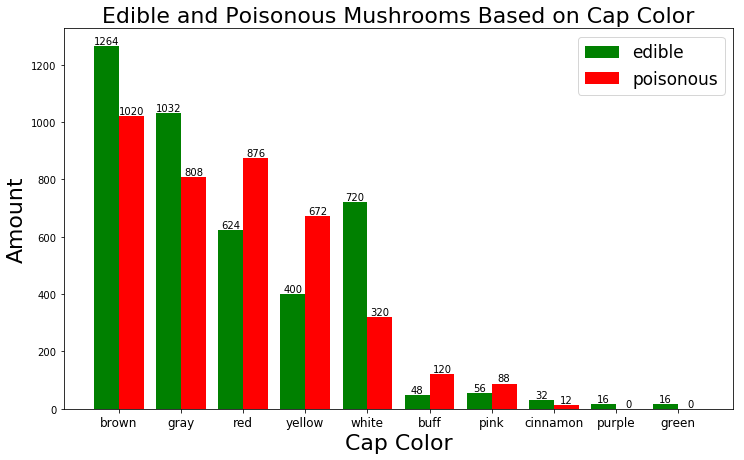

[1264, 1032, 624, 400, 720, 48, 56, 32, 16, 16]
[1020, 808, 876, 672, 320, 120, 88, 12, 0, 0]


In [8]:
#The following bar chart shows the number of mushrooms which are edible or poisonous based on cap-color
poisonous_cc = [] #Poisonous color-cap list
edible_cc = []    #Edible color-cap list
for capColor in cap_color_labels:
    size = len(mushrooms[mushrooms['cap-color'] == capColor].index)
    edibles = len(mushrooms[(mushrooms['cap-color'] == capColor) & (mushrooms['class'] == 'e')].index)
    edible_cc.append(edibles)
    poisonous_cc.append(size-edibles)
                        
#Ploting details
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_cc , width, color='g')
poison_bars = ax.bar(ind+width, poisonous_cc , width, color='r')

#text for labels, title and axes ticks
ax.set_xlabel("Cap Color",fontsize=22)
ax.set_ylabel('Amount',fontsize=22)
ax.set_title('Edible and Poisonous Mushrooms Based on Cap Color',fontsize=22)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars, 10)
autolabel(poison_bars, 10)
plt.show()  #Display plot 
print(edible_cc)
print(poisonous_cc)

The above chart shows the amout of mushrooms which are edible or poisonous based on cap colors.The green bars represent edible, red bars represent poisonous mushrooms. For example 1264 mushrooms which have brown cap color are edible. On the other hand, 1020 muchrooms which have brown cap color are poisonous. 

The plot shows that there is not a strong relation between cap color and mushroom edibility. 

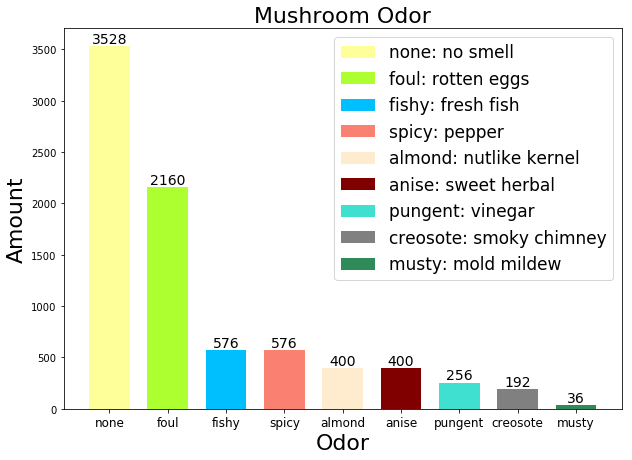

In [9]:
#The following bar chart shows the number of mushrooms based on "odor"

#Get the total number of mushrooms for each 'odor' 
odors = mushrooms['odor'].value_counts()
odor_height = odors.values.tolist() #Provides numerical values
odor_labels = odors.axes[0].tolist() #Converts index labels object to list

#Ploting details
width = 0.7 
ind = np.arange(9)  # the x locations for the groups
colors = ['#FFFF99','#ADFF2F','#00BFFF','#FA8072','#FFEBCD','#800000','#40E0D0','#808080','#2E8B57']

fig, ax = plt.subplots(figsize=(10,7))
odor_bars = ax.bar(ind, odor_height , width, color=colors)

#Text for labels, title and axes ticks
ax.set_xlabel("Odor",fontsize=22)
ax.set_ylabel('Amount',fontsize=22)
ax.set_title('Mushroom Odor',fontsize=22)
ax.set_xticks(ind) #Positioning on the x axis
ax.set_xticklabels(('none', 'foul','fishy','spicy','almond','anise','pungent','creosote','musty'),
                  fontsize = 12)
ax.legend(odor_bars, ['none: no smell','foul: rotten eggs', 'fishy: fresh fish','spicy: pepper',
                      'almond: nutlike kernel', 'anise: sweet herbal', 'pungent: vinegar',
                     'creosote: smoky chimney', 'musty: mold mildew'],fontsize=17)
autolabel(odor_bars)        
plt.show() #Display plot 

Mushroom odor has 9 dimensions including 'no odor'. Almost 45% of the data falls into 'no odor' category. Then come 'foul', 'fishy' and 'spicy' odor categories. 

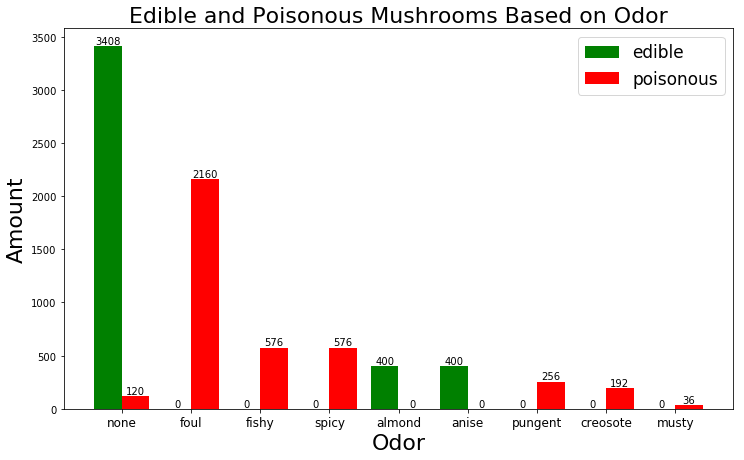

[3408, 0, 0, 0, 400, 400, 0, 0, 0]
[120, 2160, 576, 576, 0, 0, 256, 192, 36]


In [10]:
#Following chart shows the  number of mushrooms which are edible or poisonous based on odor

poisonous_od = [] #Poisonous odor list
edible_od = []    #Edible odor list
for odor in odor_labels:
    size = len(mushrooms[mushrooms['odor'] == odor].index)
    edibles = len(mushrooms[(mushrooms['odor'] == odor) & (mushrooms['class'] == 'e')].index)
    edible_od.append(edibles)
    poisonous_od.append(size-edibles)
                        
#Ploting details
width = 0.40
fig, ax = plt.subplots(figsize=(12,7))
edible_bars = ax.bar(ind, edible_od , width, color='g')
poison_bars = ax.bar(ind+width, poisonous_od , width, color='r')

#Text for labels, title and axes ticks
ax.set_xlabel("Odor",fontsize=22)
ax.set_ylabel('Amount',fontsize=22)
ax.set_title('Edible and Poisonous Mushrooms Based on Odor',fontsize=22)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('none', 'foul','fishy','spicy','almond','anise','pungent','creosote','musty'),
                  fontsize = 12)
ax.legend((edible_bars,poison_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars, 10)
autolabel(poison_bars, 10)
plt.show() #Display plot 
print(edible_od)
print(poisonous_od)


The chart shows that 'odor' is a strong indicative of mushroom edibility. The mushrooms in each odor category are either all poisonous or edible. 

[4040, 1712, 1248, 400, 384, 340]
('Several', 'Solitary', 'Scattered', 'Numerous', 'Abundant', 'Clustered')


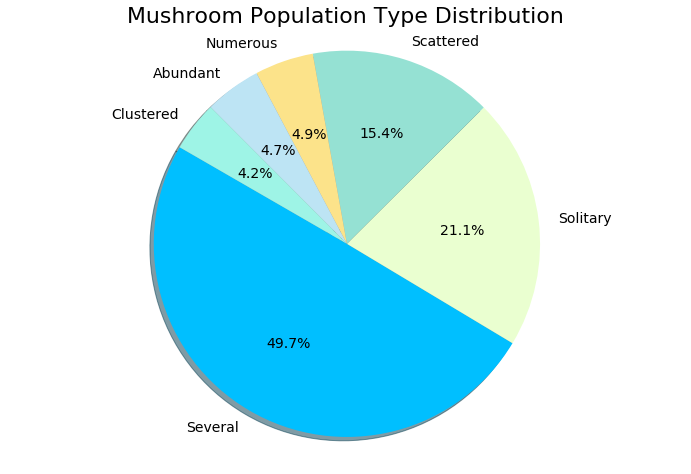

In [11]:
#'Pie  chart shows the type of mushroom population.'

#Get the population types and its values for the chart
populations = mushrooms['population'].value_counts()
pop_size = populations.values.tolist() #Provides numerical values
pop_types = populations.axes[0].tolist() #Converts index labels object to list

# Data preparation for plot
pop_labels = 'Several', 'Solitary', 'Scattered', 'Numerous', 'Abundant', 'Clustered'
colors = ['#00BFFF','#EAFFD0','#95E1D3','#FCE38A','#BDE4F4','#9EF4E6']
explode = (0, 0, 0, 0, 0, 0)  # explode 1st slice
fig = plt.figure(figsize=(12,8))
# Plot
plt.title('Mushroom Population Type Distribution', fontsize=22)
patches, texts, autotexts = plt.pie(pop_size, explode=explode, labels=pop_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=150)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
print(pop_size)
print(pop_labels)

plt.show() #Display plot 

The top three mushroom population types are 'several', 'solitary' and 'scattered'.

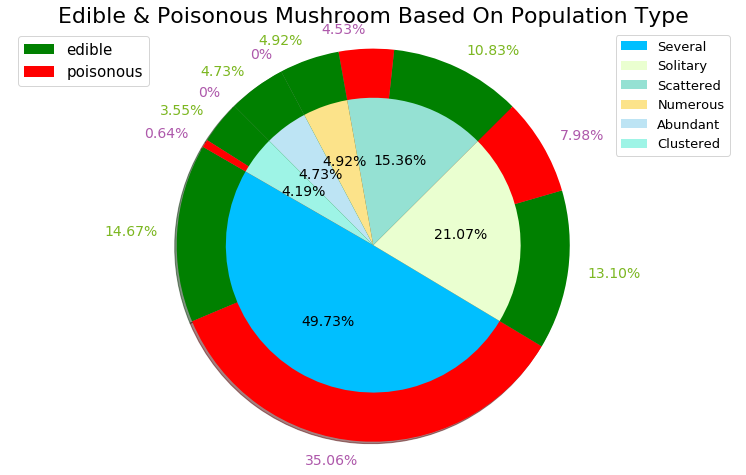

In [12]:
#Double pie chart shows  edibles and poisonous percentages of mushrrom population types.

#bDouble pie chart
poisonous_pop = [] #Poisonous population type list
edible_pop = []    #Edible population type list
for pop in pop_types: 
    size = len(mushrooms[mushrooms['population'] == pop].index)
    edibles = len(mushrooms[(mushrooms['population'] == pop) & (mushrooms['class'] == 'e')].index)
    edible_pop.append(edibles) #Gets edibles
    poisonous_pop.append(size-edibles) #Gets poisonous
combine_ed_poi = []
for i in range(0,len(edible_pop)): #Combines both edible and poisonous in a single list. 
    combine_ed_poi.append(edible_pop[i])
    combine_ed_poi.append(poisonous_pop[i])
#print(edible_pop) print(poisonous_pop) print(combine_ed_poi)

#Preparations for the the chart.
fig = plt.subplots(figsize=(13,8))
plt.title('Edible & Poisonous Mushroom Based On Population Type', fontsize=22)
percentages_e_p = ['14.67%','35.06%','13.10%', '7.98%','10.83%','4.53%','4.92%','0%','4.73%','0%',
                  '3.55%','0.64%'] #Percetanges for edible and poisonous
#First pie
patches1, texts1 = plt.pie(combine_ed_poi,radius = 2, labels= percentages_e_p,
                                colors=['g','r'], shadow=True, startangle=150)
for i in range(0,len(texts1)):
    if(i%2==0):
        texts1[i].set_color('#7CB721') #Color % labels with dark green
    else:
        texts1[i].set_color('#AE59AB') # " " dark purple
    texts1[i].set_fontsize(14)         
#Second pie
patches2, texts2, autotexts2 = plt.pie(pop_size, colors=colors, radius = 1.5,
        autopct='%1.2f%%', shadow=True, startangle=150,labeldistance= 2.2)
for aut in autotexts2:
    aut.set_fontsize(14)  #Inner autotext fontsize
    aut.set_horizontalalignment('center') #Center
#==Set 2 Legends to the plot.
first_legend   = plt.legend(patches1, ['edible','poisonous'], loc="upper left", fontsize=15)
second_ledgend = plt.legend(patches2, pop_labels, loc="best",fontsize=13)
plt.gca().add_artist(first_legend) #To display two legends
#Align both pie charts in the same position
plt.axis('equal')
plt.show()  #Display plot 

The double pie chart above shows the distribution of mushrooms which are edible or poisonous (green/red ring) based on the population type(inside pie). 

The population types of mushrooms are not clear indicators of mushroom edibility.

d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
Name: habitat, dtype: int64


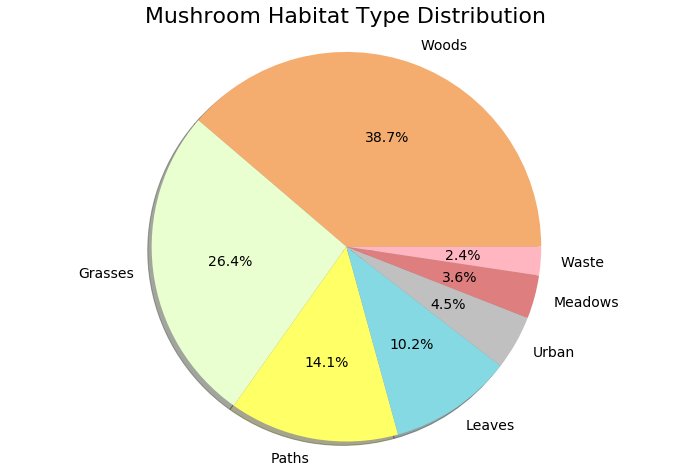

In [13]:
#Get the habitat types and its values for the chart below
habitats = mushrooms['habitat'].value_counts()
hab_size = habitats.values.tolist() #Provides numerical values
hab_types = habitats.axes[0].tolist() #Converts index labels object to list
print(habitats)
# Data to plot
hab_labels = 'Woods', 'Grasses', 'Paths', 'Leaves', 'Urban', 'Meadows', 'Waste'
colors = ['#F5AD6F','#EAFFD0','#FFFF66','#84D9E2','#C0C0C0','#DE7E7E', '#FFB6C1']
explode = (0, 0, 0, 0, 0, 0, 0)  
fig = plt.figure(figsize=(12,8))
# Plot
plt.title('Mushroom Habitat Type Distribution', fontsize=22)
patches, texts, autotexts = plt.pie(hab_size, explode=explode, labels=hab_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=360)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')
plt.show() #Display plot 

The main habitats of the mushrooms are woods, grasses and paths. 

[1880, 1408, 136, 240, 96, 256, 192]
[1268, 740, 1008, 592, 272, 36, 0]
[1880, 1268, 1408, 740, 136, 1008, 240, 592, 96, 272, 256, 36, 192, 0]


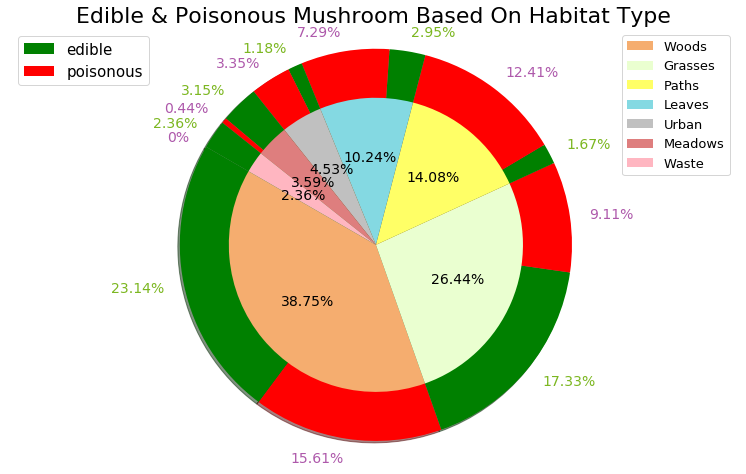

In [14]:
#Double pie chart
poisonous_hab = [] #Poisonous habitat type list
edible_hab = []    #Edible habitat type list
for hab in hab_types: 
    size = len(mushrooms[mushrooms['habitat'] == hab].index)
    edibles = len(mushrooms[(mushrooms['habitat'] == hab) & (mushrooms['class'] == 'e')].index)
    edible_hab.append(edibles) #Gets edibles
    poisonous_hab.append(size-edibles) #Gets poisonous
combine_ed_poi = []
for i in range(0,len(edible_hab)): #Combines both edible and poisonous in a single list. 
    combine_ed_poi.append(edible_hab[i])
    combine_ed_poi.append(poisonous_hab[i])
print(edible_hab) 
print(poisonous_hab) 
print(combine_ed_poi)

#Preparations for the pie chart.
fig = plt.subplots(figsize=(13,8))
plt.title('Edible & Poisonous Mushroom Based On Habitat Type', fontsize=22)
percentages_e_p = ['23.14%','15.61%','17.33%', '9.11%','1.67%','12.41%','2.95%','7.29%','1.18%','3.35%',
                  '3.15%','0.44%','2.36%','0%'] #Percetanges for edible and poisonous
#First pie
patches1, texts1= plt.pie(combine_ed_poi,radius = 2, labels=percentages_e_p,
                                colors=['g','r'], shadow=True, startangle=150)
for i in range(0,len(texts1)):
    if(i%2==0):
        texts1[i].set_color('#7CB721') #Color % labels with dark green
    else:
        texts1[i].set_color('#AE59AB') # " " dark purple
    texts1[i].set_fontsize(14)         #make labels bigger
#Second pie
patches2, texts2, autotexts2 = plt.pie(hab_size, colors=colors, radius = 1.5,
        autopct='%1.2f%%', shadow=True, startangle=150,labeldistance= 2.2)
for aut in autotexts2:
    aut.set_fontsize(14)  #Inner autotext fontsize
    aut.set_horizontalalignment('center') #Center
#Set 2 Legends to the plot.
first_legend   = plt.legend(patches1, ['edible','poisonous'], loc="upper left", fontsize=15)
second_ledgend = plt.legend(patches2, hab_labels, loc="best",fontsize=13)
plt.gca().add_artist(first_legend) #To display two legends
#Align both pie charts in the same position
plt.axis('equal')
plt.show()

Mushrooms which grow in 'waste' habitat are 100% edible. 

There are some other habitats which are dominated by poisonous mushrooms. Paths, urbans and leaves host mostly poisonous mushrooms. 


# Predictive Analysis

# Models

We are going to apply 5 supervised machine learning models on the given dataset that are better suited to deal with categorization and with all features being categorical. The strategy is to apply default model with no tuning of the hyperparameters to keep the models simple. We plot the ROC curve for each algorithm to understand the performance of each model for the same training and testing division. Then we do 10-fold cross validation for each model to select the best machine learning model for this dataset. The models used are as follows:

    Logistic Regression 
    Gaussian Naive Bayes 
    Random Forest
    Decision Tree 
    KNN (with Euclidean distance and Hamming distance)

First we transform all the categorical variables to numbers.

In [15]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in mushrooms.columns:
    mushrooms[col] = labelencoder.fit_transform(mushrooms[col])
mushrooms.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


Then we separate the data into features and labels.

In [17]:
X = mushrooms.iloc[:,1:23]  # all rows, all the features and no labels
y = mushrooms.iloc[:, 0]  # all rows, labels only

In [18]:

X.head()


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [19]:
X.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [20]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

In [21]:
X.describe()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


We can see that, without scaling, features like cap color and gill color would have more effect on the algorithm than features like bruises and veil type since they have larger variance due to the amount of diffent choices.

In [22]:
mushrooms.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.061820,0.174532,0.169407,NaN,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.116177,0.099299,0.097160,NaN,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.213775,0.274574,0.253505,NaN,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.010894,0.296548,0.278708,NaN,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.257224,-0.058299,-0.074781,NaN,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


We can see from the correlation matrix that the features are mostly uncorrelated.

# Transforming the data

Scale each feature to standard normal.

In [25]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ..., 
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

We separated 80% of the data for training and 20% for testing.

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

# 1 - Logistic Regression (default)

Logistic Regression is the first one that comes to mind when doing dichotomous categorization.

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics

model_LR= LogisticRegression()

Train the model:

In [28]:
model_LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

We test the trained model both on the training set and the testing set to catch if the model is overfitting or underfitting.

In [29]:
print("Training accuracy:", 100*model_LR.score(X_train,y_train), "%")
print("Testing accuracy:", 100* model_LR.score(X_test,y_test), "%")

Training accuracy: 95.7685797815 %
Testing accuracy: 95.8153846154 %


These results may be reflecting our luck with our training and testing division. We do 10-fold cross validation to determine the actual performance of the model.

In [30]:
scores_LR = cross_val_score(model_LR, X, y, cv=10, scoring='accuracy')
print(scores_LR)

[ 0.65436654  0.85116851  0.98277983  0.98646986  0.9102091   0.88314883
  0.99876847  0.99630542  0.66584464  0.94821208]


In [31]:
print("Accuracy with 10 fold cross validation:", 100*scores_LR.mean(), "%")

Accuracy with 10 fold cross validation: 88.7727329315 %


Let's compute the confusion matrix and calculate precision and recall to better understand what is being misclassified.

In [32]:
y_probLR = model_LR.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_predLR = np.where(y_probLR >= 0.5, 1, 0) # This will threshold the probabilities to give class predictions.

confusion_matrix=metrics.confusion_matrix(y_test,y_predLR)
print(confusion_matrix)
#horizontal "truth", vertical "predicted"
#first column 0 -edible
#second column 1- poisonous

[[814  31]
 [ 37 743]]


In [33]:
auc_roc=metrics.classification_report(y_test,y_predLR)
print(auc_roc)

             precision    recall  f1-score   support

          0       0.96      0.96      0.96       845
          1       0.96      0.95      0.96       780

avg / total       0.96      0.96      0.96      1625



And as the last indicator of performance let's calculate the area under the ROC curve and plot the ROC curve.

In [34]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_probLR)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9902988924290701

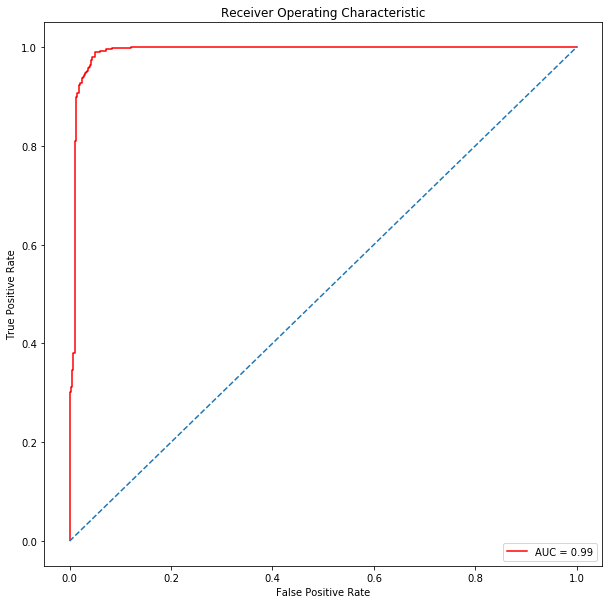

In [35]:

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 2 - Gaussian Naive Bayes

Since we've concluded that the features are mostly uncorrelated Naive Bayes is the second algorithm of choice to compare.

In [36]:
from sklearn.naive_bayes import GaussianNB
model_naive = GaussianNB()
model_naive.fit(X_train, y_train)

GaussianNB(priors=None)

We test the trained model both on the training set and the testing set to catch if the model is overfitting or underfitting.

In [37]:
print("Training accuracy:", 100*model_naive.score(X_train,y_train), "%")
print("Test Accuracy:", 100* model_naive.score(X_test,y_test), "%")

Training accuracy: 91.9372211109 %
Test Accuracy: 93.1692307692 %


Then we do 10-fold cross validation to determine the actual performance of the model.

In [39]:
scores_NB = cross_val_score(model_naive, X, y, cv=10, scoring='accuracy')
print(scores_NB)

[ 0.59778598  0.78843788  0.97908979  0.9803198   0.84870849  0.81303813
  0.81034483  0.81650246  0.85326757  0.97533909]


In [40]:
print("Accuracy with 10 fold cross validation:", 100*scores_NB.mean(), "%")

Accuracy with 10 fold cross validation: 84.6283402289 %


In [41]:
y_probNB = model_naive.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_predNB = np.where(y_probNB > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
print("Number of mislabeled points from %d points : %d"
      % (X_test.shape[0],(y_test!= y_predNB).sum()))

Number of mislabeled points from 1625 points : 111


Let's compute the confusion matrix and calculate precision and recall to better understand what is being misclassified.

In [42]:
confusion_matrix=metrics.confusion_matrix(y_test,y_predNB)
print(confusion_matrix)

[[786  59]
 [ 52 728]]


In [43]:
auc_roc=metrics.classification_report(y_test,y_predNB)
print(auc_roc)

             precision    recall  f1-score   support

          0       0.94      0.93      0.93       845
          1       0.93      0.93      0.93       780

avg / total       0.93      0.93      0.93      1625



And as the last indicator of performance let's calculate the area under the ROC curve and plot the ROC curve.

In [44]:
auc_roc=metrics.roc_auc_score(y_test,y_predNB) #check whether it is useful 
auc_roc

0.9317554240631164

In [45]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_probNB)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9592201486876043

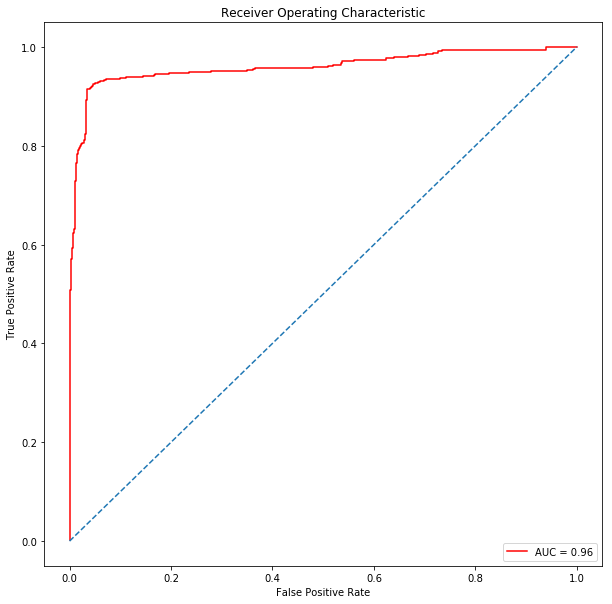

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 3 - Random Forest

As all the features are categorical, unless a mushroom being poisonous or edible is not totally random, we expected Random Forest algortihm to perform exceptionally well.

In [46]:
from sklearn.ensemble import RandomForestClassifier

model_RF=RandomForestClassifier()

Train the model:

In [47]:
model_RF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

We test the trained model both on the training set and the testing set to catch if the model is overfitting or underfitting.

In [48]:
print("Training accuracy:", 100*model_RF.score(X_train,y_train), "%")
print("Test Accuracy:", 100* model_RF.score(X_test,y_test), "%")

Training accuracy: 100.0 %
Test Accuracy: 100.0 %


Then we do 10-fold cross validation to determine the actual performance of the model.

In [49]:
scores_RF = cross_val_score(model_RF, X, y, cv=10, scoring='accuracy')
print(scores_RF)

[ 0.68511685  1.          1.          1.          1.          1.          1.
  1.          0.99260173  1.        ]


In [50]:
print("Accuracy with 10 fold cross validation:", 100*scores_RF.mean(), "%")

Accuracy with 10 fold cross validation: 96.7771857743 %


As always we compute the confusion matrix and calculate precision and recall for comparison even though the model was 100% accurate with our test/train division.

In [51]:
y_probRF = model_RF.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_predRF = np.where(y_probRF > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
confusion_matrix=metrics.confusion_matrix(y_test,y_predRF)
print(confusion_matrix)

[[845   0]
 [  0 780]]


In [52]:
auc_roc=metrics.classification_report(y_test,y_predRF)
print(auc_roc)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       845
          1       1.00      1.00      1.00       780

avg / total       1.00      1.00      1.00      1625



And Receiver Operating Characteristics curve metrics for comparison:

In [53]:
auc_roc=metrics.roc_auc_score(y_test,y_predRF)
auc_roc

1.0

In [54]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_probRF)
roc_auc = auc(false_positive_rate, true_positive_rate)

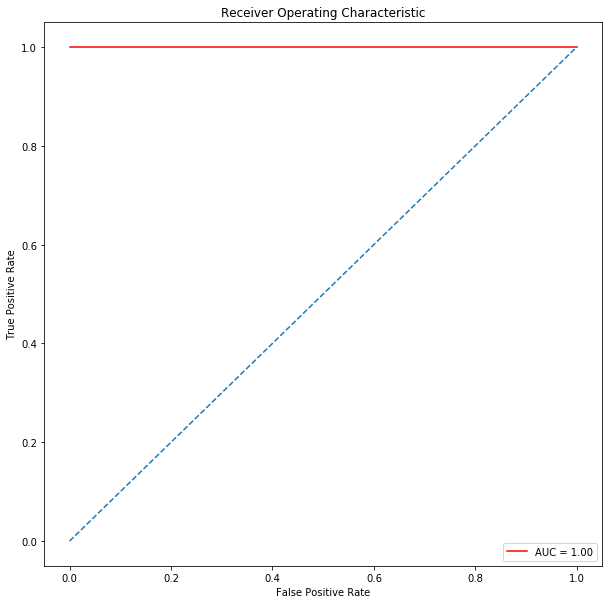

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

We can get feature importances from the trained random forest model. Even though this graph changes with every training due to the nature of Random Forest being trained randomly with bagging and reduced features, looking at several of them still gives a pretty good idea on which features to watch for.

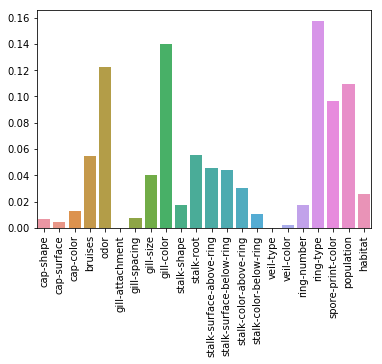

In [270]:
# Re-training the Random Forest
#rfc = RandomForestClassifier()
#rfc.fit(X_train, y_train)
#pred_rfc = rfc.predict(X_test)

#https://www.kaggle.com/rruizendaal/overview-of-ml-algorithms-and-feature-importance 


# ********* plot importance of features 
importances = model_RF.feature_importances_
#print(importances)
plot = sns.barplot(x=X.columns, y=importances)

for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

# 4 - Decision Tree

Since Random Forest's fit was perfect we suspected maybe we were killing the fly with too big of an hammer, i.e the model was fitting to perfectly to the dataset we have and possibly would predict an outlier poorly. So we tried the Decision Tree.

In [56]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier()

Train the model:

In [57]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Test the trained model both on the training set and the testing set to catch if the model is overfitting or underfitting.

In [58]:
print("Training accuracy:", 100*model_tree.score(X_train,y_train), "%")
print("Test Accuracy:", 100* model_tree.score(X_test,y_test), "%")

Training accuracy: 100.0 %
Test Accuracy: 100.0 %


Do 10-fold cross validation to determine the actual performance of the model.

In [59]:
scores_T = cross_val_score(model_tree, X, y, cv=10, scoring='accuracy')
print(scores_T)

[ 0.68511685  1.          1.          1.          1.          1.          1.
  1.          0.89642417  1.        ]


In [60]:
print("Accuracy with 10 fold cross validation:", 100*scores_T.mean(), "%")

Accuracy with 10 fold cross validation: 95.8154101886 %


As always we compute the confusion matrix and calculate precision and recall for comparison even though the model was 100% accurate with our test/train division.

In [61]:
y_probT = model_tree.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_predT = np.where(y_probT > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
confusion_matrix=metrics.confusion_matrix(y_test,y_predT)
confusion_matrix

array([[845,   0],
       [  0, 780]])

In [62]:
auc_roc=metrics.classification_report(y_test,y_predT)
print(auc_roc)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       845
          1       1.00      1.00      1.00       780

avg / total       1.00      1.00      1.00      1625



And the Receiver Operating Characteristics curve metrics for comparison:

In [63]:
auc_roc=metrics.roc_auc_score(y_test,y_predT)
auc_roc

1.0

In [64]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_probT)
roc_auc = auc(false_positive_rate, true_positive_rate)

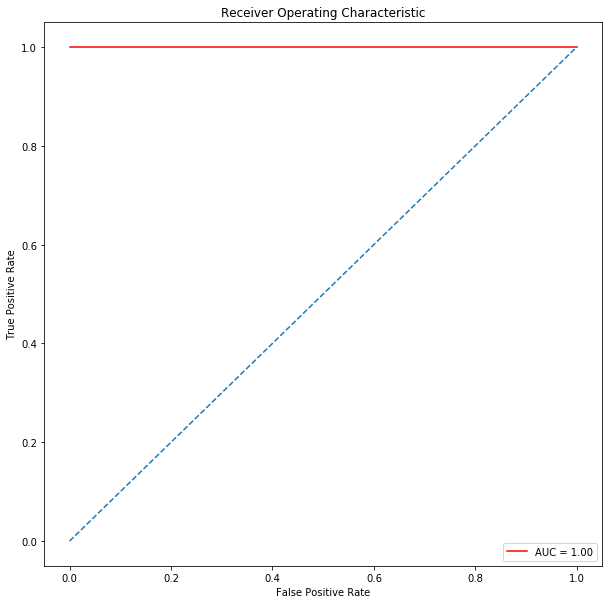

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

We can draw the whole Decision Tree and actually use it for manual identification of a mushroom with graphviz library.

In [66]:
#https://www.kaggle.com/haimfeld87/analysis-and-classification-of-mushrooms
import graphviz
from sklearn import tree
dot_data = tree.export_graphviz(model_tree, out_file=None, 
                         feature_names=X.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

ModuleNotFoundError: No module named 'graphviz'

As in the Random Forest model we can graph feature importances in the Decision Tree. However, Decision Tree always gives the most importance to it's root and consecutively to branches. Hence this is not a good indicator of the actual feature importances.

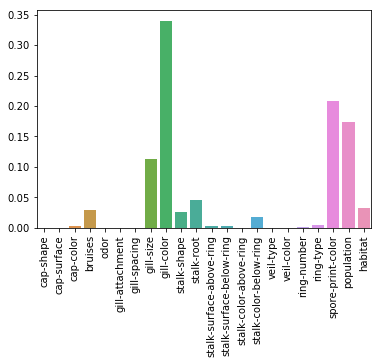

In [286]:
importances_tree = model_tree.feature_importances_
#print(importances)
plot = sns.barplot(x=X.columns, y=importances_tree)

for item in plot.get_xticklabels():
    item.set_rotation(90)
plt.show()

# 5 - KNN

Since all the features are categorical, our last model choice for comparison is KNN. At first we used the default model parameters. 

In [67]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Minkowski metric with parameter p=2 gives us Euclidean distance.

Test the trained model both on the training set and the testing set to catch if the model is overfitting or underfitting.

In [68]:
print("Training accuracy:", 100*model_knn.score(X_train,y_train), "%")
print("Test Accuracy:", 100* model_knn.score(X_test,y_test), "%")

Training accuracy: 100.0 %
Test Accuracy: 100.0 %


Do 10-fold cross validation to determine the actual performance of the model.

In [69]:
scores_knn = cross_val_score(model_knn, X, y, cv=10, scoring='accuracy')
print(scores_knn)

[ 0.68511685  1.          1.          1.          0.99876999  1.          1.
  1.          0.83353884  0.99260173]


In [70]:
print("Accuracy with 10 fold cross validation:", 100*scores_knn.mean(), "%")

Accuracy with 10 fold cross validation: 95.1002740607 %


As always we compute the confusion matrix and calculate precision and recall for comparison even though the model was 100% accurate with our test/train division.

In [71]:
y_probKNN = model_knn.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_predKNN = np.where(y_probKNN > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
confusion_matrix=metrics.confusion_matrix(y_test,y_predKNN)
confusion_matrix

array([[845,   0],
       [  0, 780]])

In [72]:
auc_roc=metrics.classification_report(y_test,y_predKNN)
print(auc_roc)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       845
          1       1.00      1.00      1.00       780

avg / total       1.00      1.00      1.00      1625



ROC curve metrics:

In [73]:
auc_roc=metrics.roc_auc_score(y_test,y_predKNN)
auc_roc

1.0

In [74]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_probKNN)
roc_auc = auc(false_positive_rate, true_positive_rate)

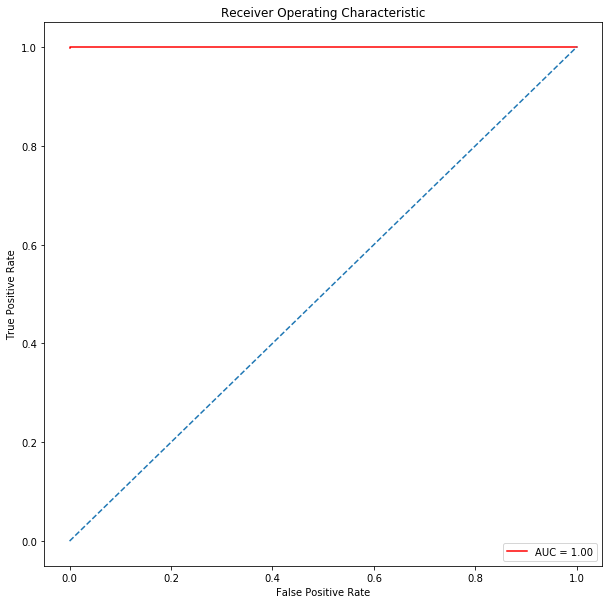

In [75]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Since the KNN model is already performing well we will not focus on finding the best K parameter for maximum accuracy. Instead we wanted to demonstrate the importance of choosing the right distance metric for the dataset at hand.

As all the features are categorical and as the distance of color yellow to color red should not be different than the distance of color yellow to color green we decided to use Hamming distance. Hamming distance is 0 if the considered feature is the same, 1 if different and additive over features.

In [76]:
model_knnH = KNeighborsClassifier(metric='hamming')
model_knnH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='hamming',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Test the trained model both on the training set and the testing set to catch if the model is overfitting or underfitting.

In [77]:
print("Training accuracy:", 100*model_knnH.score(X_train,y_train), "%")
print("Test Accuracy:", 100* model_knnH.score(X_test,y_test), "%")

Training accuracy: 100.0 %
Test Accuracy: 100.0 %


Do 10-fold cross validation to determine the actual performance of the model.

In [78]:
scores_knnH = cross_val_score(model_knnH, X, y, cv=10, scoring='accuracy')
print(scores_knnH)

[ 0.68511685  1.          1.          1.          1.          1.          1.
  1.          0.90135635  1.        ]


In [79]:
print("Accuracy with 10 fold cross validation:", 100*scores_knnH.mean(), "%")

Accuracy with 10 fold cross validation: 95.8647320135 %


We actually got an improvement in accuracy over the Euclidean KNN model.

As always we compute the confusion matrix and calculate precision and recall for comparison even though the model was 100% accurate with our test/train division.

In [80]:
y_probKNNH = model_knnH.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_predKNNH = np.where(y_probKNNH > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
confusion_matrix=metrics.confusion_matrix(y_test,y_predKNNH)
confusion_matrix

array([[845,   0],
       [  0, 780]])

In [81]:
auc_roc=metrics.classification_report(y_test,y_predKNNH)
print(auc_roc)

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       845
          1       1.00      1.00      1.00       780

avg / total       1.00      1.00      1.00      1625



ROC curve metrics:

In [82]:
auc_roc=metrics.roc_auc_score(y_test,y_predKNNH)
auc_roc

1.0

# Conclusion

Models ranked with respect to their performances on the Mushroom dataset:  

    Random Forest - 96.6%
    KNN (Hamming) - 95.9%
    Decision Tree - 95.8%
    KNN (Euclidean) - 95.1%
    Logistic Regression - 88.8%
    Naive Bayes - 84.6%
    
As expected Random Forest and KNN performed better on categorical features than Logistic Regression and Naive Bayes which depend on the distribution of the variables.

References:

1-https://archive.ics.uci.edu/ml/datasets/mushroom    

2- https://archive.ics.uci.edu/ml/datasets/mushroom
    